Short project:
https://www.coursera.org/learn/machine-learning-with-chatgpt-image-classification-model/home/welcome

Use ChatGPT to generate machine learning model, alter it, and see results. This solves the MNIST problem with Keras.

Prompt:
> Write Python code of a neural network to solve the MNIST problem using Keras using fully connected layers and categorical crossentropy as the loss function. Include model evaluation on the test set. Use 20% of the training set as a validation set.

Add a time check

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import time

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten the 28x28 input images
    Dense(128, activation='relu'),      # Fully connected layer with 128 units and ReLU activation
    Dense(64, activation='relu'),       # Fully connected layer with 64 units and ReLU activation
    Dense(10, activation='softmax')     # Output layer with 10 units (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_train_time = time.time()

# Train the model with the training data and validate using the validation data
history_fc_cc = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

print(f'Train time: {time.time() - start_train_time}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.2634 - accuracy: 0.9238 - val_loss: 0.1588 - val_accuracy: 0.9540
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1102 - accuracy: 0.9659 - val_loss: 0.1499 - val_accuracy: 0.9538
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0754 - accuracy: 0.9774 - val_loss: 0.1043 - val_accuracy: 0.9698
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.0919 - val_accuracy: 0.9728
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0447 - accuracy: 0.9860 - val_loss: 0.0950 - val_accuracy: 0.9723
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.1235 - val_accuracy: 0.9643
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0906 - val_

Prompt:
> plot the training and test loss using matplotlib
>
> plot 20 random images with label from the training set and see if the model predicts the images correct by color coding wrong predictions with red and right predictions with green

Make into functions. Needed adjustments on color.

In [47]:
import matplotlib.pyplot as plt
import random


def plot_training_test_loss(history):
    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    ax = plt.gca()
    ax.set_ylim([0, 0.28])

    plt.show()


def plot_images(history):
    # Plot 20 random images with color coding for correct and incorrect predictions
    plt.figure(figsize=(15, 7))
    for i in range(20):
        index = random.randint(0, len(x_train) - 1)
        image = x_train[index]
        label = y_train[index]

        # Reshape the image for prediction
        image = image.reshape(1, 28, 28)

        # Make a prediction
        prediction = model.predict(image)
        predicted_label = np.argmax(prediction)

        # Color coding for correct (green) and incorrect (red) predictions
        if predicted_label == label:
            color = 'green'
        else:
            color = 'red'

        # Plot the image with the predicted label
        plt.subplot(4, 5, i + 1)
        plt.imshow(image.reshape(28, 28), cmap='gray')
        plt.title(f'True: {label}, Pred: {predicted_label}', color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 21ms/step


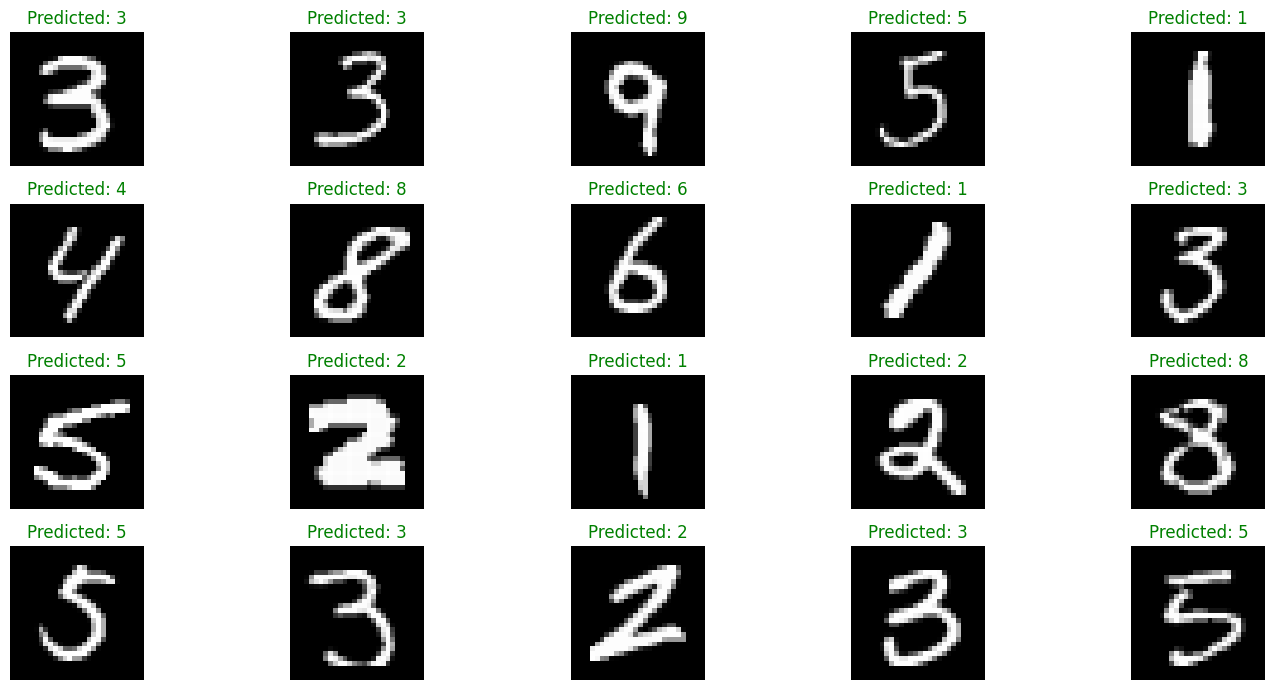

In [37]:
plot_images(history_fc_cc)

Prompt:
> Change the loss function to be sparse categorical crossentropy

Reuse previous model, and include changes made by ChatGPT

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import time

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# # Convert labels to one-hot encoded vectors
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten the 28x28 input images
    Dense(128, activation='relu'),      # Fully connected layer with 128 units and ReLU activation
    Dense(64, activation='relu'),       # Fully connected layer with 64 units and ReLU activation
    Dense(10, activation='softmax')     # Output layer with 10 units (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_train_time = time.time()

# Train the model with the training data and validate using the validation data
history_fc_scc = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

print(f'Train time: {time.time() - start_train_time}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2639 - accuracy: 0.9235 - val_loss: 0.1483 - val_accuracy: 0.9538
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1114 - accuracy: 0.9669 - val_loss: 0.1100 - val_accuracy: 0.9672
Epoch 3/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0788 - accuracy: 0.9753 - val_loss: 0.0962 - val_accuracy: 0.9704
Epoch 4/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0602 - accuracy: 0.9813 - val_loss: 0.0921 - val_accuracy: 0.9720
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.0966 - val_accuracy: 0.9735
Epoch 6/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 0.0925 - val_accuracy: 0.9736
Epoch 7/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0311 - accuracy: 0.9896 - val_loss: 0.1032 -

Prompt:
> Use convolutional layers

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension for Conv2D layers
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build the neural network model with convolutional layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_train_time = time.time()

# Train the model with the training data and validate using the validation data
history_cl_scc = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

print(f'Train time: {time.time() - start_train_time}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/10
1500/1500 [==============================] - 152s 100ms/step - loss: 0.1732 - accuracy: 0.9464 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 2/10
1500/1500 [==============================] - 159s 106ms/step - loss: 0.0534 - accuracy: 0.9838 - val_loss: 0.0477 - val_accuracy: 0.9868
Epoch 3/10
1500/1500 [==============================] - 153s 102ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.0405 - val_accuracy: 0.9876
Epoch 4/10
1500/1500 [==============================] - 142s 95ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0425 - val_accuracy: 0.9866
Epoch 5/10
1500/1500 [==============================] - 152s 102ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0470 - val_accuracy: 0.9868
Epoch 6/10
1500/1500 [==============================] - 148s 99ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0523 - val_accuracy: 0.9872
Epoch 7/10
1500/1500 [==============================] - 148s 99ms/step - loss: 0.0144 - accuracy: 0.9951 - val_los

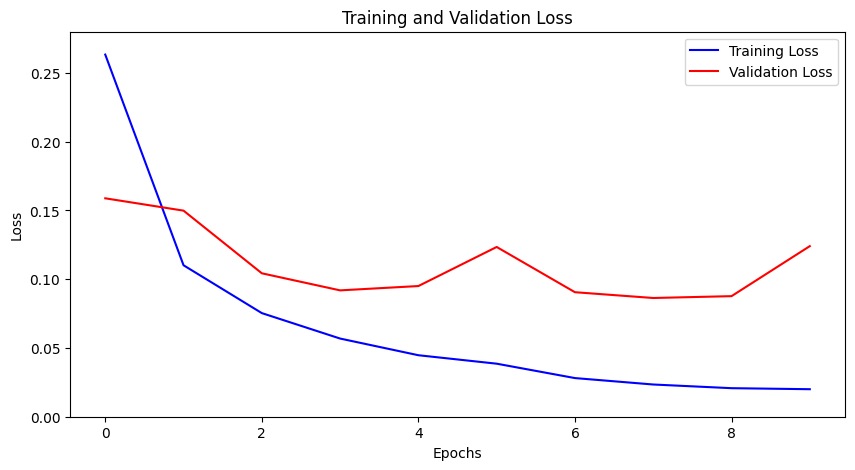

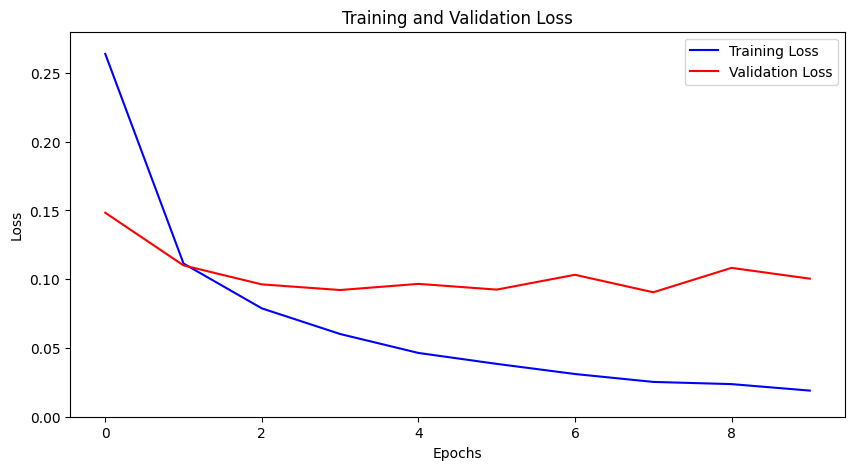

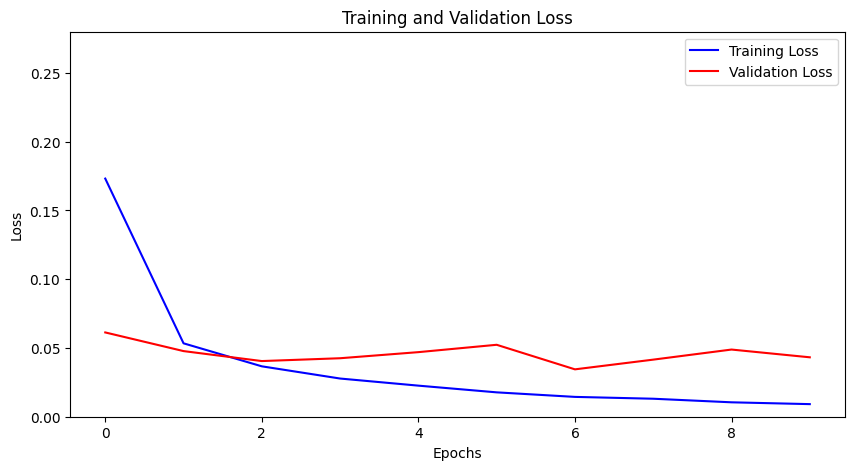

In [48]:
plot_training_test_loss(history_fc_cc)
plot_training_test_loss(history_fc_scc)
plot_training_test_loss(history_cl_scc)